2GZAV - SEMESTRÁLNÍ PROJEKT - Velčovský (2025) - 01 Aplikace základních filtrů OpenCV

In [61]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

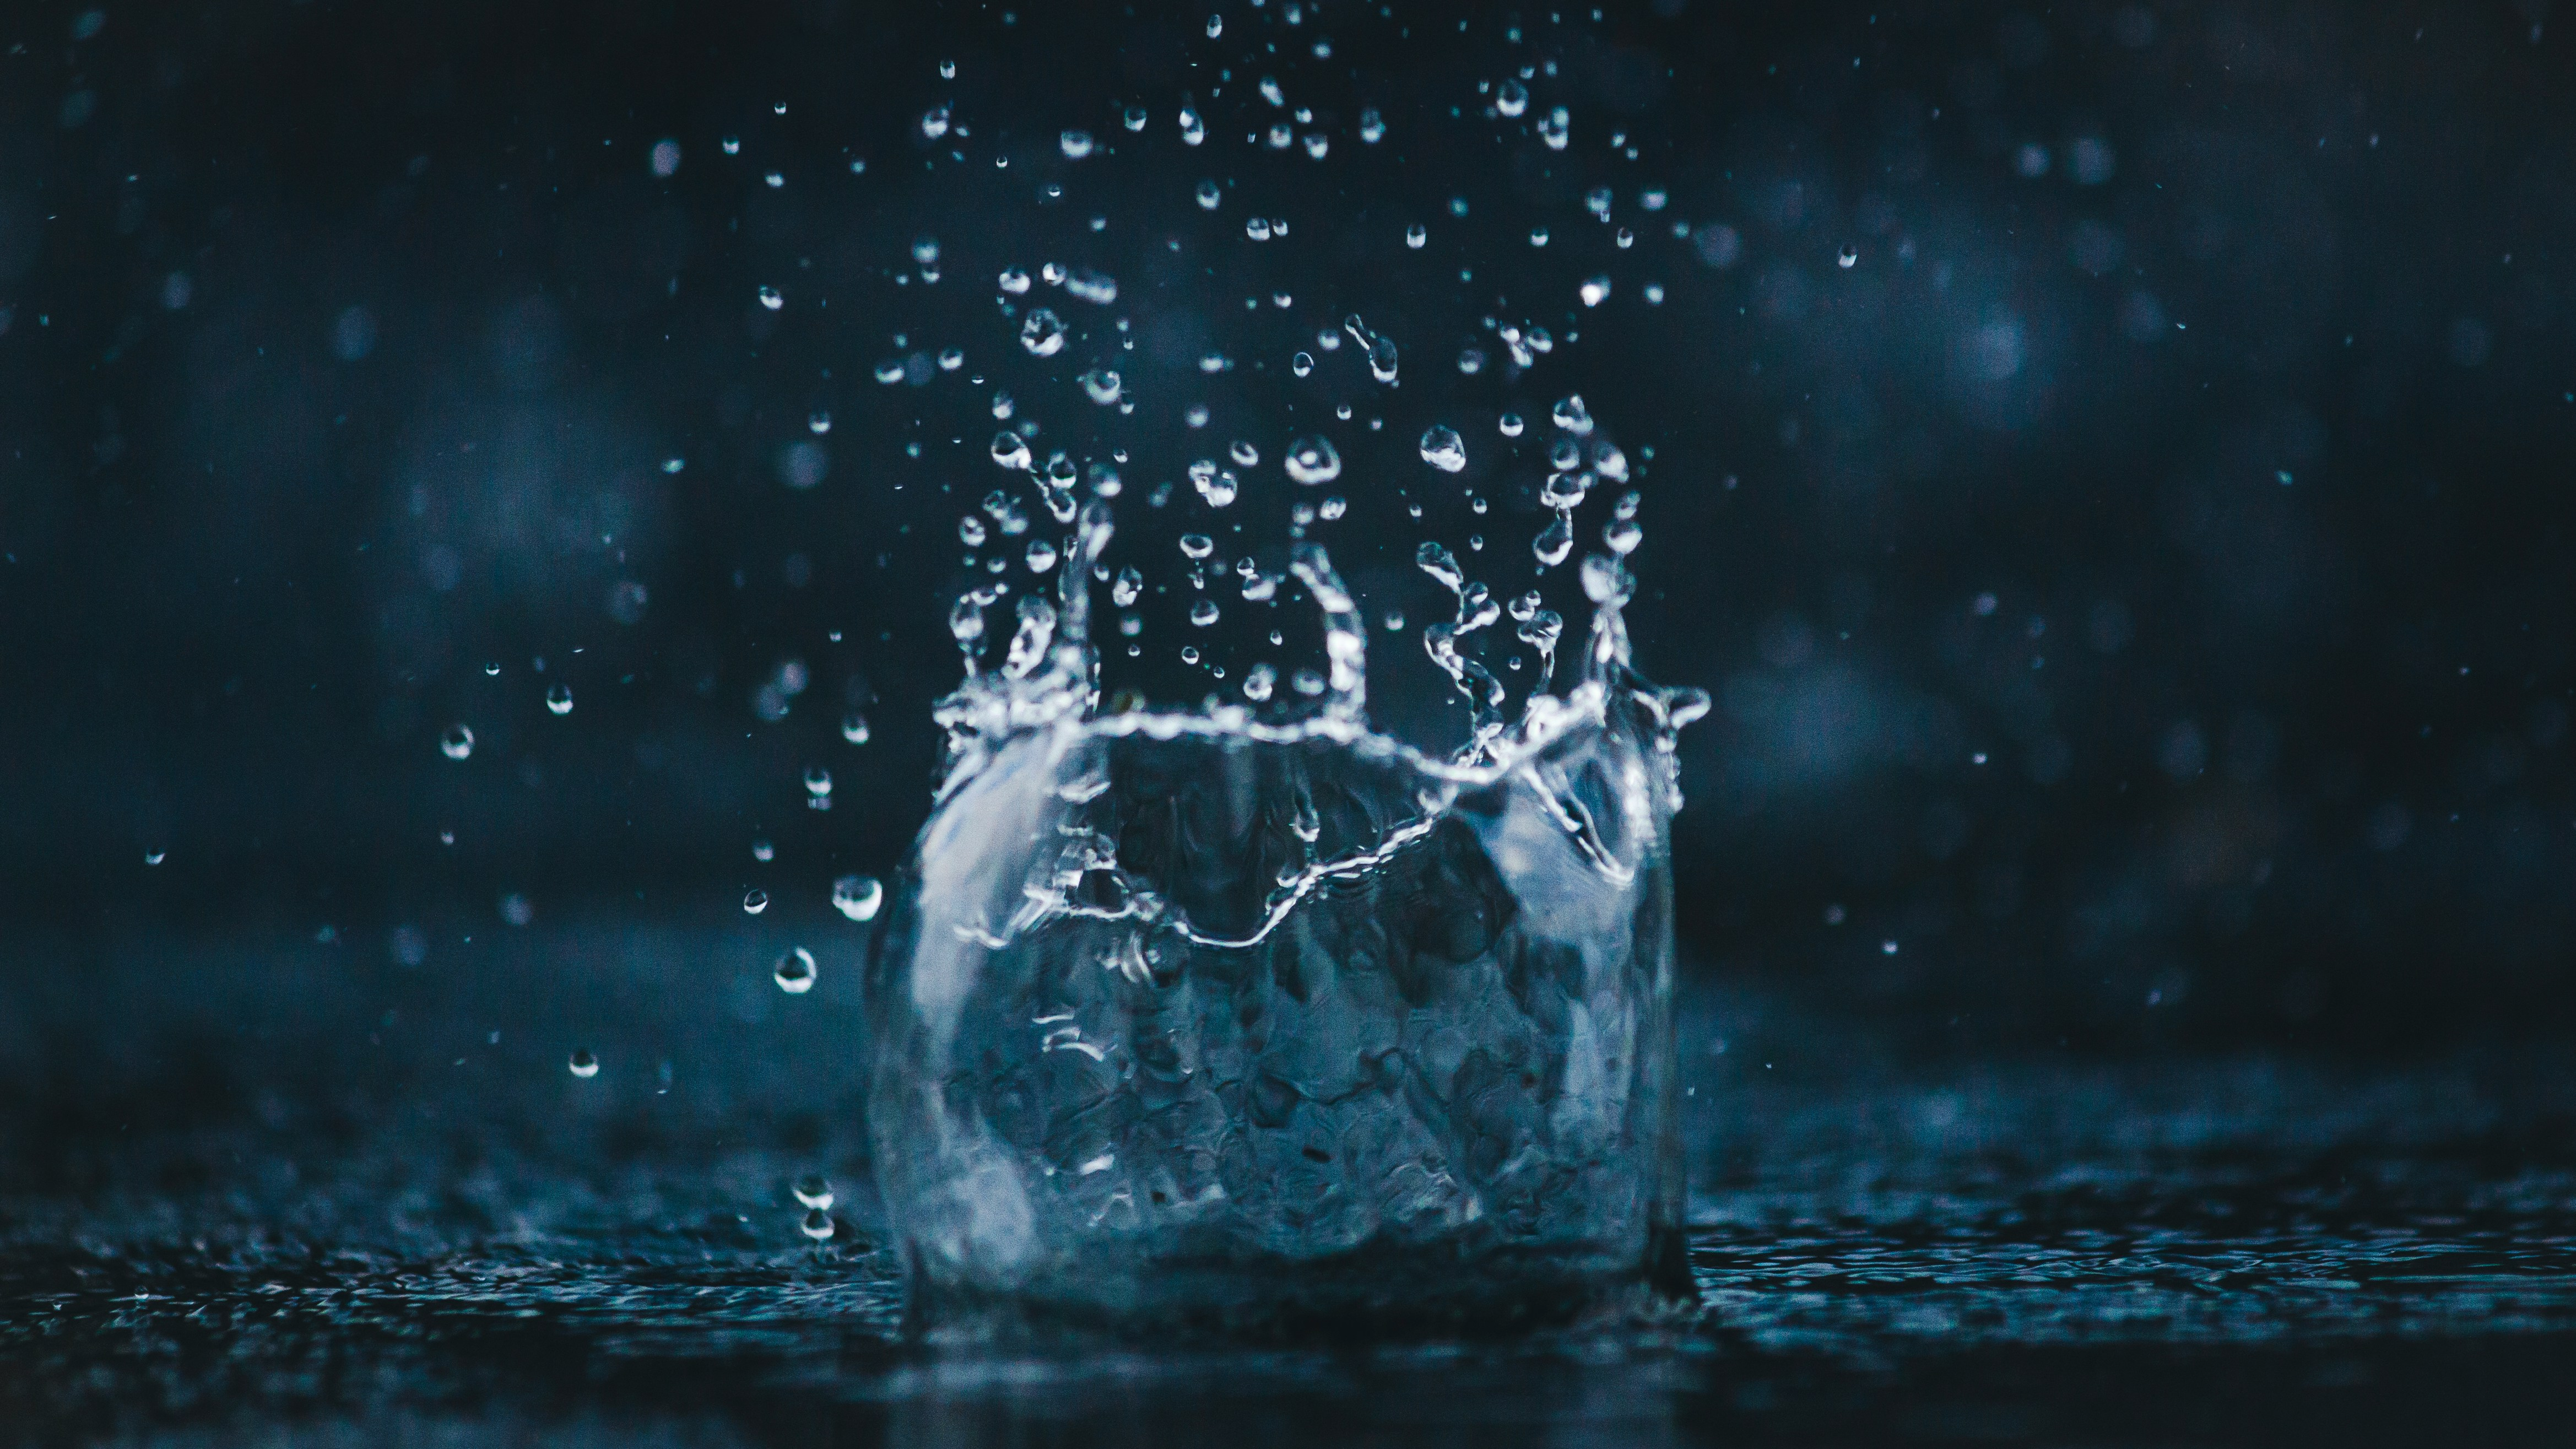

In [62]:
# Display pixel image.
Image(filename="./resources/unsplash-water-drop.jpg")

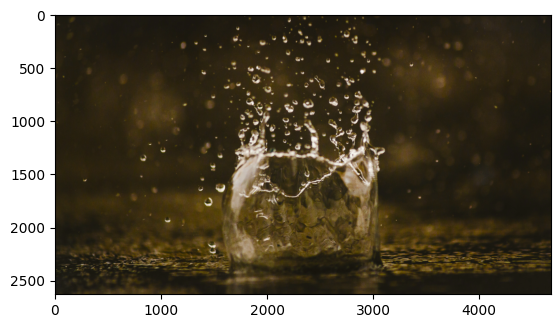

In [63]:
drop_img = cv2.imread("./resources/unsplash-water-drop.jpg", 1)
# Display image.
plt.imshow(drop_img)
plt.show()

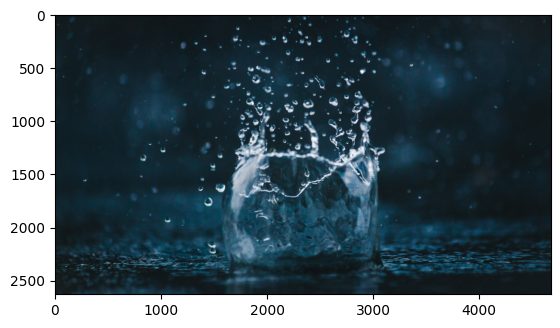

In [64]:
drop_img = cv2.imread("./resources/unsplash-water-drop.jpg", 1)
drop_img_channels_reversed = drop_img[:, :, ::-1]
# Display image.
plt.imshow(drop_img_channels_reversed)
plt.show()

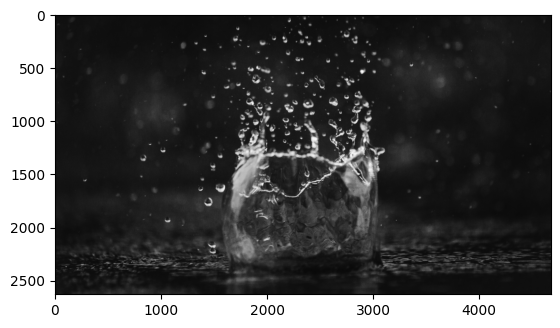

In [65]:
drop_img_gray = cv2.imread("./resources/unsplash-water-drop.jpg", 0)
plt.imshow(drop_img_gray, cmap='gray')
plt.show()

Apply Simple blur to an image


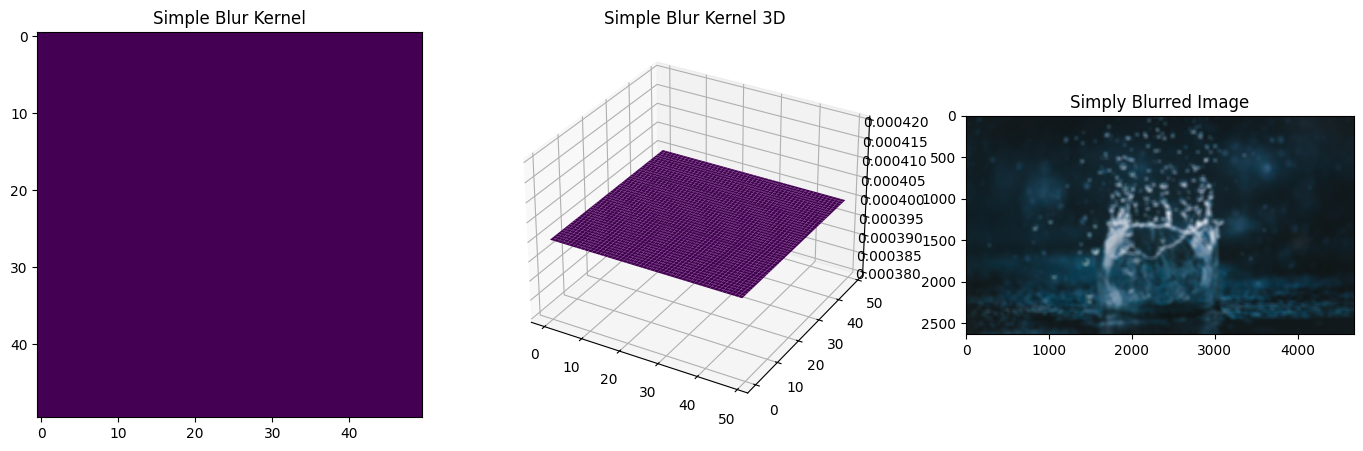

Blurred image saved to c:\Users\petav\VisualCode-work\_PYTHON\projekt\outputs\01_filters-simply_blurred_output.jpg


In [72]:
fig = plt.figure(figsize=(17, 5))

def simple_blur(image, kernel_size):

    # print out the simple blur characteristic
    plt.subplot(131)	
    kernel = box_blur_kernel(kernel_size)	
    plt.imshow(kernel)
    plt.title("Simple Blur Kernel")

    # print out the simple blur caracteristic in 3D
    ax = fig.add_subplot(132, projection='3d')
    x = np.arange(0, kernel_size, 1)
    y = np.arange(0, kernel_size , 1)
    X,Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, kernel, cmap='viridis', edgecolor='none')
    plt.title("Simple Blur Kernel 3D")

    # print out the result of the simple blur
    plt.subplot(133)
    simply_blurred = cv2.blur(image, (kernel_size, kernel_size))
    plt.imshow(cv2.cvtColor(simply_blurred, cv2.COLOR_BGR2RGB))
    plt.title("Simply Blurred Image")
    
    plt.show()

    # save picture
    cv2.imwrite('./outputs/01_filters-simply_blurred_output.jpg', simply_blurred)
    print(f"Blurred image saved to {os.path.abspath('./outputs/01_filters-simply_blurred_output.jpg')}")

def box_blur_kernel(kernel_size):
    value = 1 / (kernel_size * kernel_size)
    kernel = np.full((kernel_size, kernel_size), value, dtype=np.float32)
    return kernel

simple_blur(drop_img, 50)

Apply Gaussian blur to an image

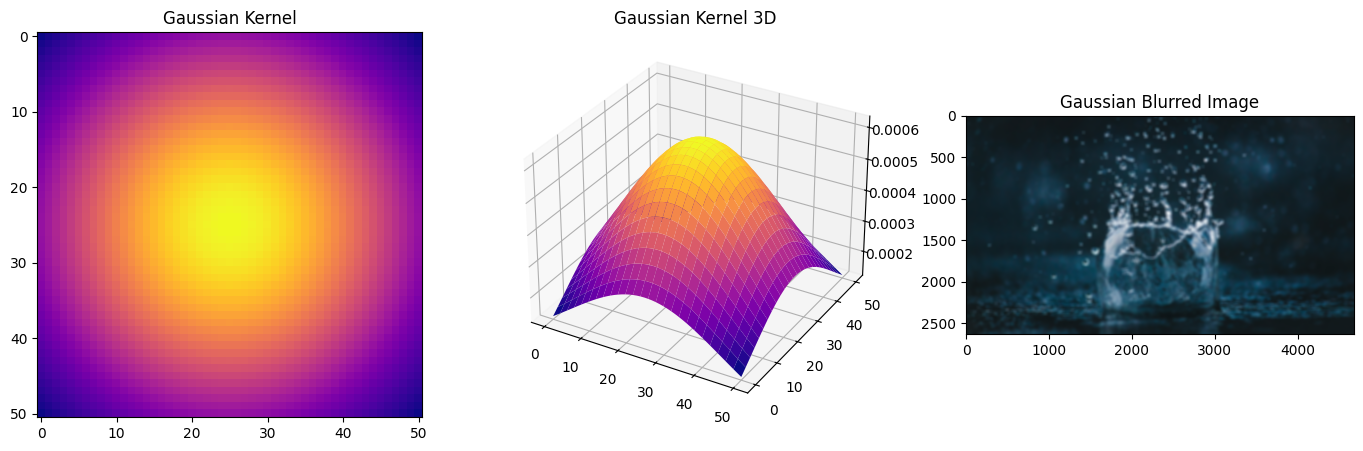

Blurred image saved to c:\Users\petav\VisualCode-work\_PYTHON\projekt\outputs\01_filters-gaussian_blurred_output.jpg


In [85]:
fig = plt.figure(figsize=(17, 5))

def gaussian_blur(image, n, sigma):

    # print out the gaussian characteristic
    plt.subplot(131)	
    kernel = gaussian_blur_kernel(n, sigma)	
    plt.imshow(kernel, cmap='plasma')
    plt.title("Gaussian Kernel")

    # print out the gaussian caracteristic in 3D
    ax = fig.add_subplot(132, projection='3d')
    x = np.arange(0, n  , 1)
    y = np.arange(0, n , 1)
    X,Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, kernel, cmap='plasma', edgecolor='none')
    plt.title("Gaussian Kernel 3D")

    # print out the result of the gaussian blur
    plt.subplot(133)
    gauss_blurred = cv2.GaussianBlur(image, (n,n), sigma)
    plt.imshow(cv2.cvtColor(gauss_blurred, cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Blurred Image")
    
    plt.show()

    # save picture
    cv2.imwrite('./outputs/01_filters-gaussian_blurred_output.jpg', gauss_blurred)
    print(f"Blurred image saved to {os.path.abspath('./outputs/01_filters-gaussian_blurred_output.jpg')}")

def gaussian_blur_kernel(kernel_size, sigma):   
    kernel_one = cv2.getGaussianKernel(kernel_size, sigma)
    kernel_two = kernel_one @ kernel_one.T
    return kernel_two

gaussian_blur(drop_img, 51, 20)

Apply Median filter to reduce Salt and pepper noise (unwanted dots in the image)

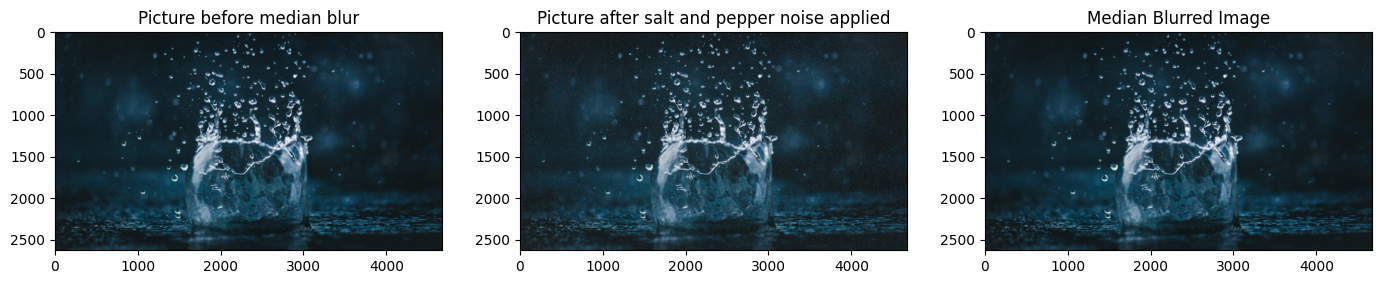

Salt and pepper noisy image saved to c:\Users\petav\VisualCode-work\_PYTHON\projekt\outputs\01_filters-median_blurred_salt_and_pepper_applied.jpg
Blurred image saved to c:\Users\petav\VisualCode-work\_PYTHON\projekt\outputs\01_filters-median_blurred_output.jpg


In [86]:
fig = plt.figure(figsize=(17, 5))

def median_blur(image, n):

    # print out initial image
    plt.subplot(131)	
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Picture before median blur")

    # creating salt and pepper mask noisy image
    probability = 0.05
    noisy_img = create_salt_and_pepper_noised_image(image, probability)
    plt.subplot(132)
    plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
    plt.title("Picture after salt and pepper noise applied")

    # print out the result of the median blur image
    plt.subplot(133)
    median_blurred = cv2.medianBlur(noisy_img, n)
    plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
    plt.title("Median Blurred Image")

    plt.show()

    # save picture after salt and pepper mask applied
    cv2.imwrite('./outputs/01_filters-median_blurred_salt_and_pepper_applied.jpg', noisy_img)
    print(f"Salt and pepper noisy image saved to {os.path.abspath('./outputs/01_filters-median_blurred_salt_and_pepper_applied.jpg')}")

    # save picture after median blur
    cv2.imwrite('./outputs/01_filters-median_blurred_output.jpg', median_blurred)
    print(f"Blurred image saved to {os.path.abspath('./outputs/01_filters-median_blurred_output.jpg')}")
    
def create_salt_and_pepper_noised_image(image, prob):
    noisy_img = image.copy()
    rnd = np.random.rand(*image.shape[:2])

    pepper_mask = rnd < (prob / 2)
    salt_mask = (rnd >= (prob / 2)) & (rnd < prob)

    noisy_img[pepper_mask] = [0, 0, 0]
    noisy_img[salt_mask] = [255, 255, 255]

    return noisy_img

median_blur(drop_img, 5)